# Analysing Shadow from a Rod Perpendicular to the Ground

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PI = np.pi
EO = np.radians(23.5)
RANGE = 12
MARGIN = .85

def shadow_curve(delta, alpha, beta, return_index=False):
    minus_z = np.cos(delta)*np.cos(alpha)*np.cos(beta) + np.sin(alpha)*np.sin(beta)
    x =  (-np.cos(delta)*np.cos(alpha)*np.sin(beta) + np.sin(alpha)*np.cos(beta)) / minus_z
    y = np.sin(delta)*np.cos(alpha) / minus_z

    bool_index = (minus_z > 0.) & (np.abs(x) < MARGIN*RANGE) & (np.abs(y) < MARGIN*RANGE)
    x = x[bool_index]
    y = y[bool_index]
    ans = [x ,y]
    if return_index:
        ans.append(bool_index)
    return ans


## Images

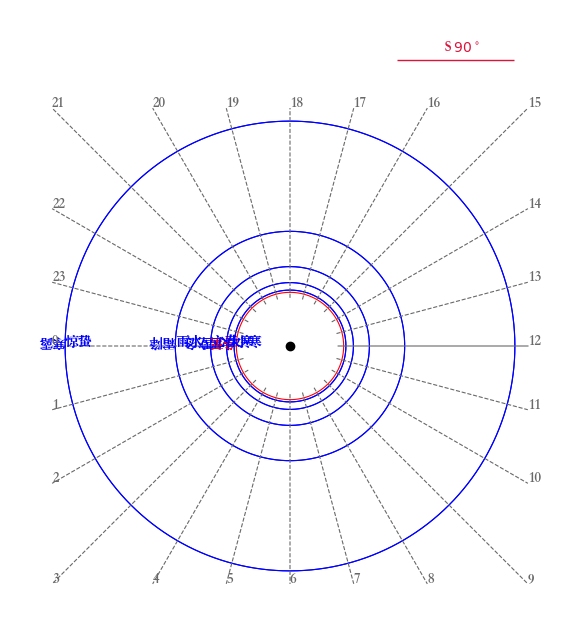

In [4]:
TEXTS = ["春分", "清明", "谷雨", "立夏", "小满", "芒种",
         "夏至", "小暑", "大暑", "立秋", "处暑", "白露",
         "秋分", "寒露", "霜降", "立冬", "小雪", "大雪",
         "冬至", "小寒", "大寒", "立春", "雨水", "惊蛰",]

beta = np.radians(-90)

plt.rcParams["font.family"] = "Songti SC"
fig, ax = plt.subplots(figsize=(8,8))

delta_array = np.linspace(-np.pi, np.pi, 5000)
for i in range(24):
    color = "red" if i%6 == 0 else "blue"
    parity = -1 if i in range(7,19) else 0
    ha = "right" if parity == -1 else "left"

    theta = PI / 12 * i
    alpha = np.arcsin(np.sin(theta) * np.sin(EO))
    x, y = shadow_curve(delta_array, alpha, beta)
    ax.plot(x, y, color=color, linewidth=.8)
    if x.size:
        ax.annotate(TEXTS[i], (x[parity],y[parity]),rotation=180*parity ,ha=ha, color=color)

alpha_array = np.linspace(-1.1*EO, 1.1*EO, 5000)
for j in range(24):
    line = "-" if j == 12 else "--"
    parity = -1 if beta < 0 else 0

    delta = PI / 12 * (j - 12)
    x, y = shadow_curve(delta, alpha_array, beta)
    ax.plot(x, y, color="dimgrey", linestyle=line, linewidth=.8)
    if x.size:
        ax.annotate(str(j), (x[parity],y[parity]), color="dimgrey")
    
width = .15 if np.abs(beta) != PI/2 else 0  
ax.arrow(.8*RANGE, 1.02*RANGE, -5, 0,
         length_includes_head=True,
         width = width,
         shape="left",
         color="crimson")
ax.scatter(0,0, color="black")
if beta > 0.:
    string = "N"
elif beta < 0.:
    string = "S"
else:
    string = ""
string += " $%.0f^\circ$" % np.abs(np.degrees(beta))
ax.text(.55*RANGE, 1.05*RANGE, string, color="crimson")
ax.set_xlim(-RANGE, RANGE)
ax.set_ylim(-RANGE, 1.2*RANGE)
ax.set_aspect("equal")
ax.set_axis_off()
fig.savefig("./images/shadow_position_S90.png", bbox_inches='tight',dpi=300)
plt.rcParams["font.family"] = "sans-serif"

In [16]:
plt.rcParams["font.family"] = "Songti SC"
# fig, ax = plt.subplots(figsize=(8,8))


beta_array = np.deg2rad(np.linspace(75, -90, 480))
delta_array = np.linspace(-np.pi, np.pi, 5000)

for ii, beta in enumerate(beta_array):
    fig, ax = plt.subplots(figsize=(8,8))
    for i in range(24):
        color = "red" if i%6 == 0 else "blue"
        parity = -1 if i in range(7,19) else 0
        ha = "right" if parity == -1 else "left"

        theta = PI / 12 * i
        alpha = np.arcsin(np.sin(theta) * np.sin(EO))
        x, y = shadow_curve(delta_array, alpha, beta)
        ax.plot(x, y, color=color, linewidth=.8)
        if x.size:
            ax.annotate(TEXTS[i], (x[parity],y[parity]),rotation=180*parity ,ha=ha, color=color)

    alpha_array = np.linspace(-1.1*EO, 1.1*EO, 5000)
    for j in range(24):
        line = "-" if j == 12 else "--"
        parity = -1 if beta < 0 else 0

        delta = PI / 12 * (j - 12)
        x, y = shadow_curve(delta, alpha_array, beta)
        ax.plot(x, y, color="dimgrey", linestyle=line, linewidth=.8)
        if x.size:
            ax.annotate(str(j), (x[parity],y[parity]), color="dimgrey")
        
    width = .15 if np.abs(beta) != PI/2 else 0  
    ax.arrow(.8*RANGE, 1.02*RANGE, -5, 0,
            length_includes_head=True,
            width = width,
            shape="left",
            color="crimson")
    ax.scatter(0,0, color="black")
    if beta > 0.:
        string = "N"
    elif beta < 0.:
        string = "S"
    else:
        string = ""
    string += " $%.0f^\circ$" % np.abs(np.degrees(beta))
    ax.text(.55*RANGE, 1.05*RANGE, string, color="crimson")
    ax.set_xlim(-RANGE, RANGE)
    ax.set_ylim(-RANGE, 1.2*RANGE)
    ax.set_aspect("equal")
    ax.set_axis_off()
    plt.close(fig)
    fig.savefig(f"./shadow_pattern/shadow_pattern{ii}.png", bbox_inches='tight',dpi=300)
# plt.rcParams["font.family"] = "sans-serif"

## Angluar velocity

$$
\psi  = \arctan\left(\frac yx\right) = \arctan\left(\frac{\sin\delta\cos\alpha}{-\cos\delta\cos\alpha\sin\beta+\sin\alpha\cos\beta}\right)
$$

$$
\omega = \frac{\mathrm{d}\psi}{\mathrm{d}\delta} = \frac{\cos\alpha(\sin\alpha \cos \beta  \cos \delta -\cos\alpha\sin
   \beta)}{(\sin \alpha \cos \beta -\cos \alpha  \sin \beta  \cos \delta
   )^2+\cos ^2\alpha \sin ^2\delta}
$$

Text(0, 0.5, 'Angular velocity   $\\omega\\quad^\\circ/\\mathrm{h}$')

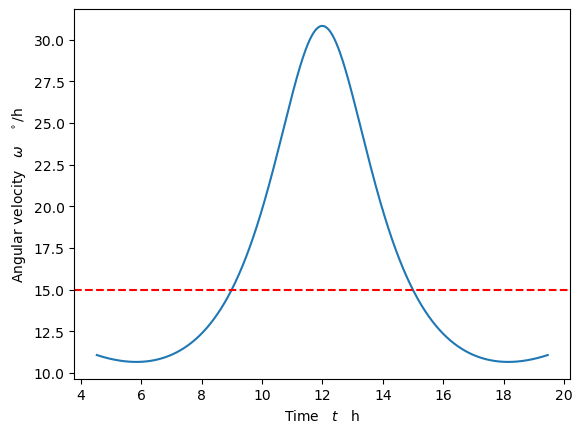

In [35]:
beta = np.radians(-50)
alpha = np.radians(-23.5)
delta_array = np.linspace(-PI, PI, 2000)
time = 12 * (1 + delta_array / PI)
delta_t = time[1] - time[0]

x, y, bool_index = shadow_curve(delta_array, alpha, beta, True)
# plt.plot(x,y)
Theta = np.degrees(np.arctan2(y,x))
# plt.plot(Theta)
plt.plot(time[bool_index][:-1], np.diff(Theta)/delta_t)
plt.axhline(15, color="red", linestyle="--")
plt.xlabel("Time   $t$   h")
plt.ylabel("Angular velocity   $\omega\quad^\circ/\mathrm{h}$")

Text(0, 0.5, 'Angular velocity   $\\omega\\quad^\\circ/\\mathrm{h}$')

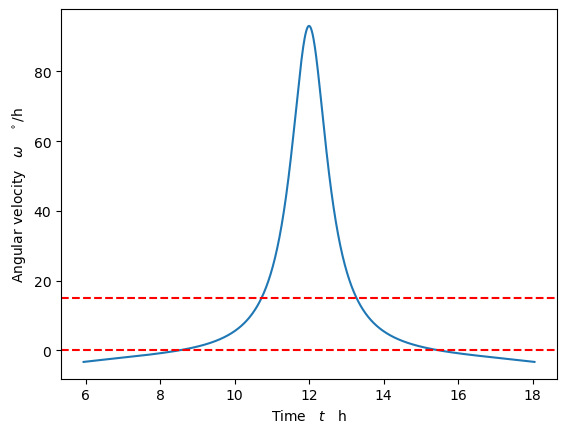

In [36]:
beta = np.radians(15)
alpha = np.radians(23.5)
delta_array = np.linspace(-PI, PI, 2000)
time = 12 * (1 + delta_array / PI)
delta_t = time[1] - time[0]

x, y, bool_index = shadow_curve(delta_array, alpha, beta, True)
# plt.plot(x,y)
Theta = np.degrees(np.arctan2(y,x))
# plt.plot(Theta)
plt.plot(time[bool_index][:-1], np.diff(Theta)/delta_t)
plt.axhline(15, color="red", linestyle="--")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Time   $t$   h")
plt.ylabel("Angular velocity   $\omega\quad^\circ/\mathrm{h}$")